In [1]:
import numpy as np
mjj_window = np.array([-30.,+30.])+125.
# mjj_window = np.array([-125,+3000.])+125.
MX_categories = np.array([250.,385.,560.,1e+6])
MVA_categories = np.array([0.300,0.561,0.826,1.1])


In [2]:
import os
# import sys; sys.path.append("~/HHbbgg_ETH/Training/python") # to load packages
#import training_utils as utils


In [3]:
import ROOT as RT
from glob import glob 

Welcome to ROOTaaS 6.05/02


In [4]:
fnames = glob('/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH_devel/outfiles/20170828_optimizedCuts_noDR_minDRGJet/GluGluToHHTo2B2G_node_*_13TeV-madgraph_preselection.root')
# fnames = glob('/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/outfiles/20170828_optimizedCuts_withDR_dijetMass/GluGluToHHTo2B2G_node_*_13TeV-madgraph_preselection.root')
# fnames = glob('/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/outfiles/20170828_optimizedCuts_noDR_minDRGJet_dijetMass/GluGluToHHTo2B2G_node_*_13TeV-madgraph_preselection.root')

In [5]:
nodes = { name.split("node")[1].split("_")[1] : RT.TFile.Open(name) for name in fnames } 

In [6]:
keys = sorted(nodes.keys())

In [7]:
import root_pandas as rpd
import pandas as pd

dfs = []

for key in keys:
    inode = int(key) if key != 'SM' else 0
    idf = rpd.read_root(nodes[key].GetName())
    idf['proc'] = np.ones((idf.shape[0],1),dtype=np.int32)*inode
    dfs.append(idf)

df = pd.concat(dfs)

In [8]:
df.describe()

,fabsCosThetaStarCS,dijetPtOverdiHiggsM,weight,fabsCosThetabb,leadingJetbDis,isSignal,PhoJetMinDr,customLeadingPhotonIDMVA,Mgg,fabsCosThetagg,MX,subleadingJetbDis,diphotonPtOverdiHiggsM,sigmaMOverMDecorr,subleadingPhotonSigOverE,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,Mjj,MVAOutput,proc
count,240664.000000,240664.000000,2.406640e+05,240664.000000,240664.000000,240664.0,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000,240664.000000
mean,0.474696,0.327204,7.194168e-04,0.499735,0.784668,1.0,1.705563,0.787091,124.370558,0.476107,500.851070,0.712255,0.381693,0.009236,0.011777,0.755836,0.009207,116.169506,0.832251,6.996094
std,0.283663,0.162351,2.823019e-04,0.287874,0.264046,0.0,0.705826,0.279635,2.140734,0.283767,229.600348,0.295891,0.197681,0.008012,0.013971,0.296153,0.012471,24.438915,0.268525,3.951105
min,0.000002,0.001230,1.375026e-07,0.000005,0.041255,1.0,0.400024,-0.899996,100.046875,0.000001,250.003876,0.047749,0.000640,0.006000,0.001026,-0.898898,0.001012,60.000385,0.001064,0.000000
25%,0.229804,0.211985,6.455219e-04,0.251194,0.655343,1.0,1.105265,0.747007,123.854893,0.231025,324.410507,0.494562,0.253578,0.006000,0.006188,0.693492,0.005260,100.844968,0.817929,4.000000
50%,0.463935,0.323410,7.417856e-04,0.498856,0.911101,1.0,1.696648,0.905023,124.688671,0.465541,443.419952,0.843667,0.373787,0.006000,0.007799,0.880197,0.006291,118.481887,0.965092,7.000000
75%,0.712927,0.422510,8.603907e-04,0.747919,0.983435,1.0,2.288454,0.953269,125.343195,0.713681,605.132126,0.973714,0.467163,0.010500,0.012776,0.943284,0.009153,131.300765,0.991502,11.000000
max,0.999989,2.529044,1.229896e-03,0.999981,0.999630,1.0,4.373101,0.997053,178.378448,0.999999,2783.885742,0.999631,3.529549,0.189250,0.495883,0.997292,0.486005,179.999616,0.999193,13.000000


In [9]:
df['Mjj_bin'] = pd.cut( df.Mjj, mjj_window )

In [10]:
df['MX_bin'] = pd.cut(df.MX, MX_categories)

In [11]:
df['MVA_bin'] = pd.cut(df.MVAOutput, MVA_categories )

In [12]:
df['selected'] = (~df['Mjj_bin'].isnull() & ~df['MVA_bin'].isnull()).astype(np.float32)*df['weight']

In [13]:
grouped = df.groupby('proc')

In [14]:
(grouped['selected']).sum() / grouped['weight'].sum()

proc
0     0.704473
2     0.691430
3     0.722116
4     0.695177
5     0.655206
6     0.710081
7     0.712469
8     0.636829
9     0.661185
10    0.677001
11    0.705848
12    0.746326
13    0.751325
dtype: float64

In [16]:
def plot_projection(grp,group,xvar,categories,bins=200,range=None):
    if group == 0:
        icell = 1
        label = "SM"
    else:
        icell = group + 3
        label = str(group)
    plt.subplot(4,4,icell)
    vals,_,_ = plt.hist(grp[xvar],weights=grp['weight'],bins=bins,range=range,label="all events")
    plt.hist(grp[xvar],weights=grp['selected'],bins=bins,range=range,label="selected events")
    plt.hist(categories,bins=bins,range=range,weights=vals.max()*np.ones_like(categories),label="boundaries")
    plt.xlabel(xvar)
    plt.ylabel("A.U.")
    plt.title("Node: %s" % label)
    plt.legend()
   # plt.show()

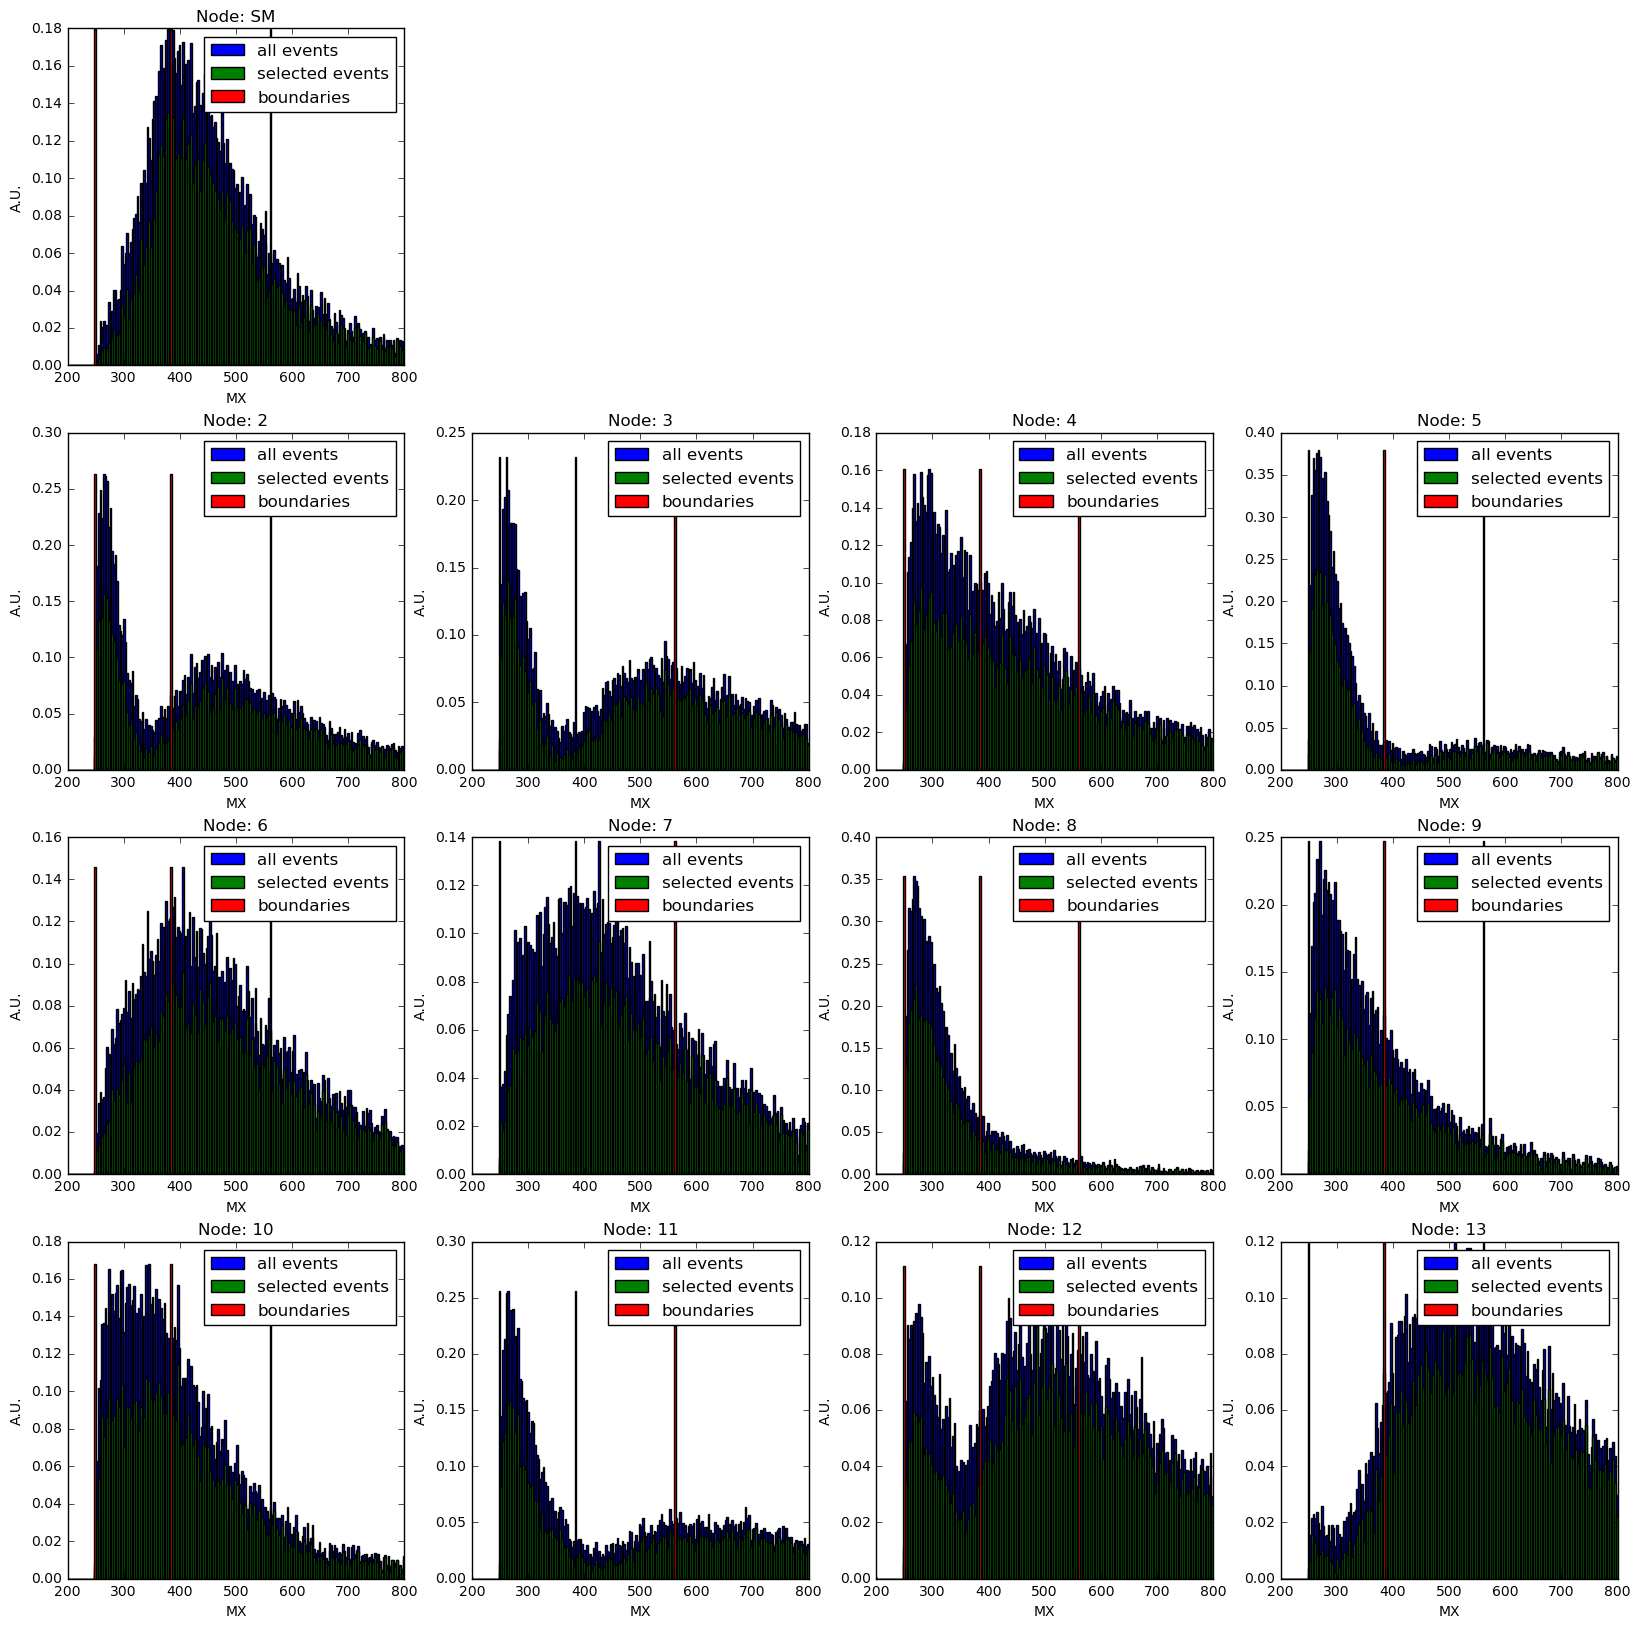

In [17]:
import matplotlib.pyplot as plt

# gouped['MX'].plot.hist(bins=200,range=[200,800],alpha=0.5,sharex=False)
plt.figure(figsize=(20,20))
for group in grouped.groups:
    grp = grouped.get_group(group)
    plot_projection(grp,group,'MX',MX_categories,bins=200,range=[200.,800.])
#     plt.hist(grp['MX'],weights=grp['weight'],bins=200,range=[200.,800.],label="all events")
#     plt.hist(grp['MX'],weights=grp['selected'],bins=200,range=[200.,800.],label="selected events")
#     print(group)
#     plt.hist(MX_categories,bins=200,range=[200,800],weights=0.15*np.ones_like(MX_categories),label="boundaries")
#     plt.xlabel("MX")
#     plt.ylabel("A.U.")
#     plt.title("Node: %d" % group)
#     plt.show()
plt.show()

In [19]:
plt.figure(figsize=(20,20))
for group in grouped.groups:
    plot_projection(grp,group,'MVAOutputTransformed',MVA_categories,bins=200,range=[0.,1.])
#     grp = grouped.get_group(group)
#     plt.hist(grp['MVAOutput'],weights=grp['weight'],bins=200,range=[0.,1.])
#     plt.hist(grp['MVAOutput'],weights=grp['selected'],bins=200,range=[0.,1.])
#     plt.hist(MVA_categories,bins=200,range=[0.,1.],weights=1.5*np.ones_like(MX_categories))
plt.show()

KeyError: 'MVAOutputTransformed'

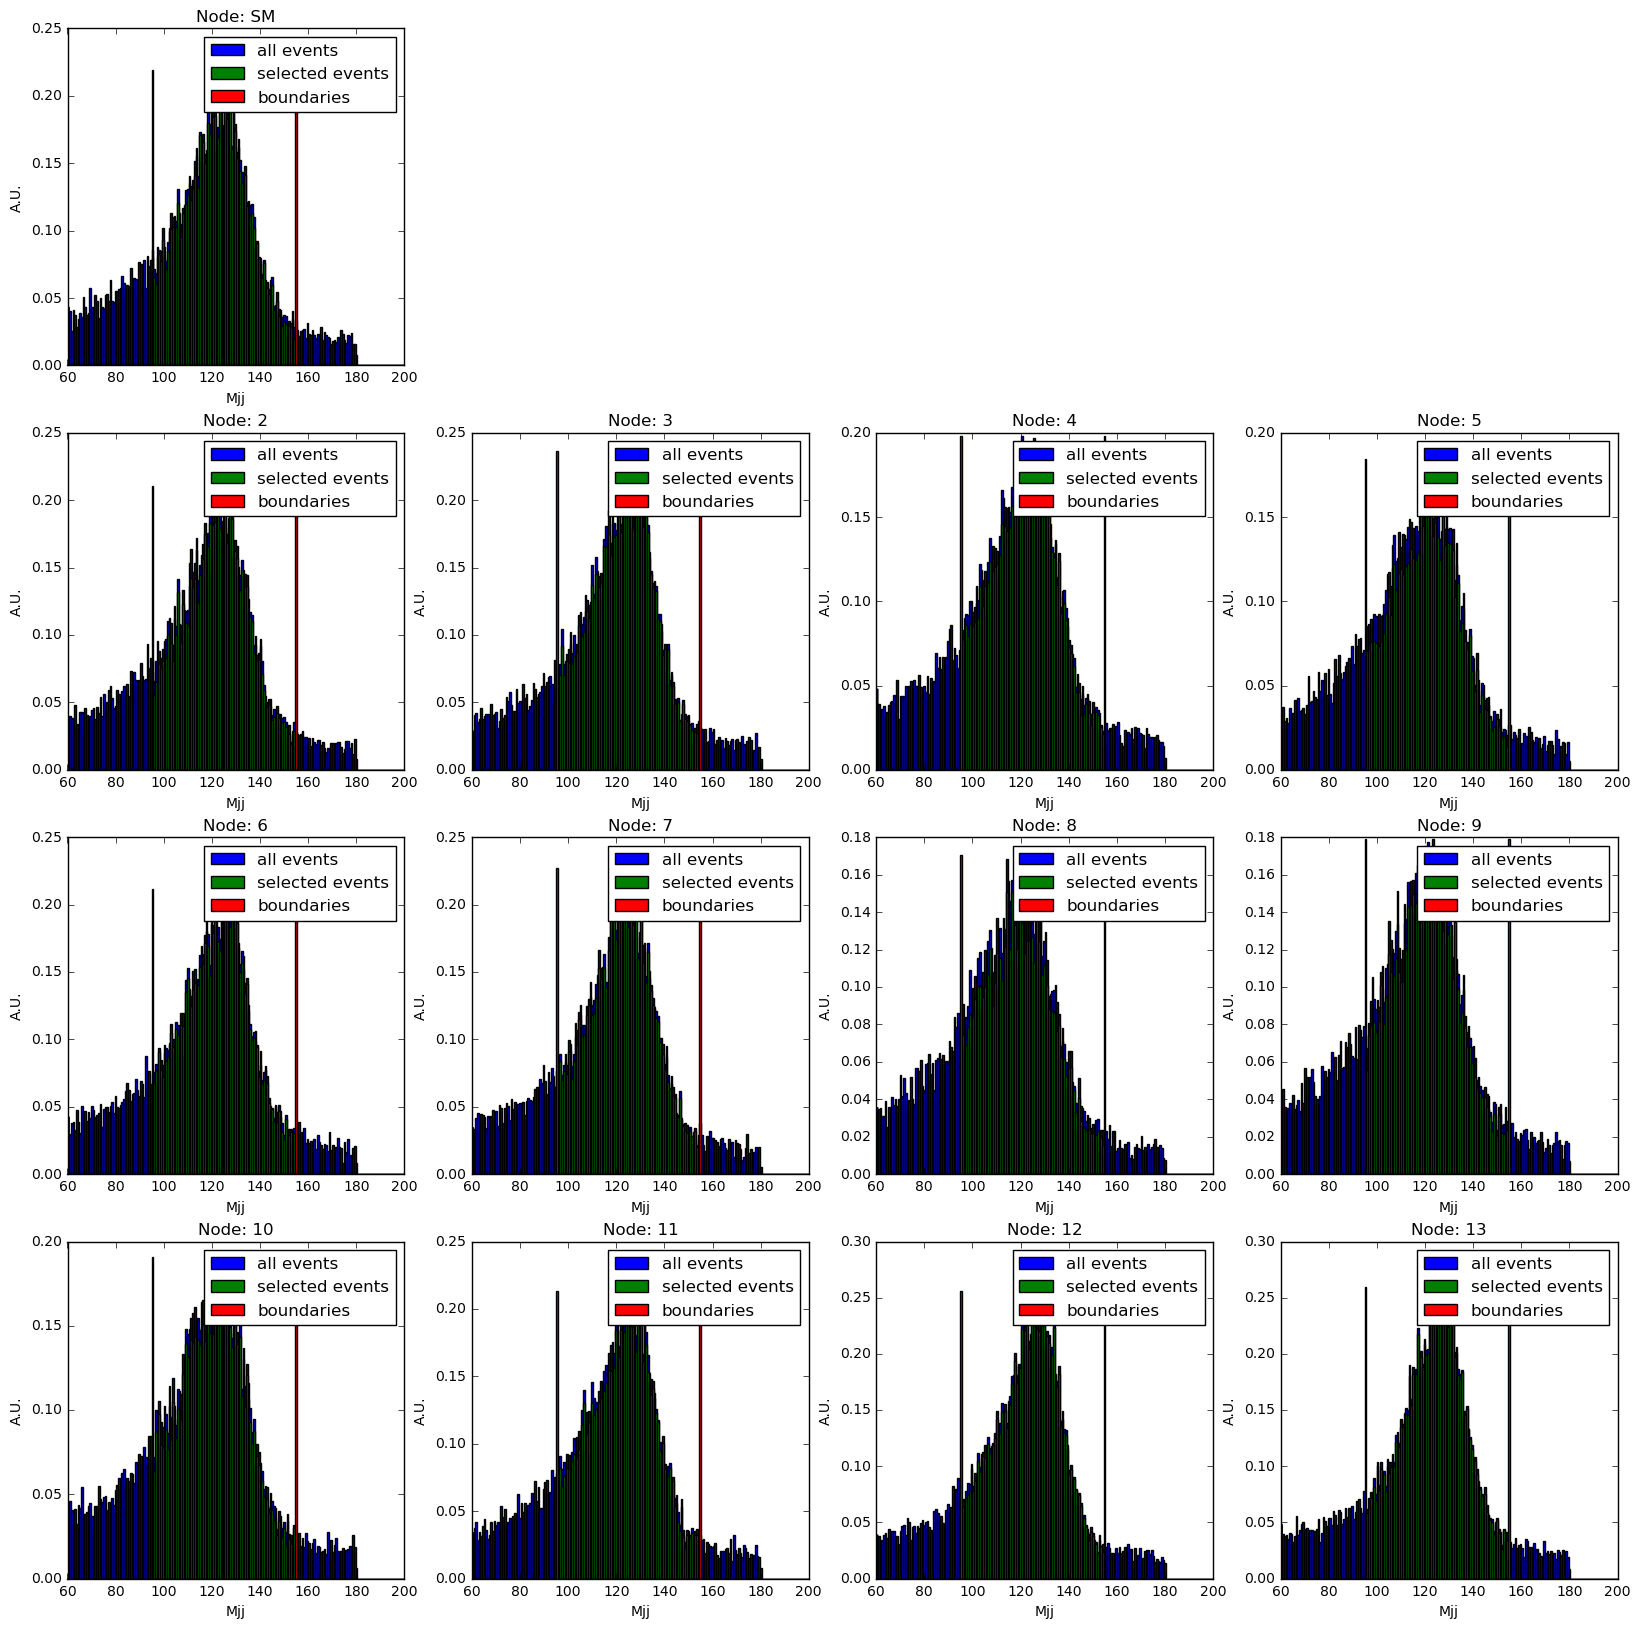

In [19]:
plt.figure(figsize=(20,20))
for group in grouped.groups:
    grp = grouped.get_group(group)
    plot_projection(grp,group,'Mjj',mjj_window,bins=200,range=[60.,200.])

#     plot_projection(grp,group,'MVAOutput',MX_categories,bins=200,range=[0.,1.])
#     all_ev,bins,_ = plt.hist(grp['Mjj'],weights=grp['weight'],bins=200,range=[60.,200.])
#     sel_ev,_,_ = plt.hist(grp['Mjj'],weights=grp['selected'],bins=200,range=[60.,200.])
#     plt.hist(mjj_window,bins=200,range=[60.,200.],weights=0.15*np.ones_like(mjj_window))
#     plt.show()
#     plt.plot(0.5*(bins[1:]+bins[:-1]),sel_ev/all_ev)
plt.show()

In [ ]:
efficiencies = df.groupby(['proc','MX_bin','MVA_bin'])['selected'].sum() / df.groupby('proc')['weight'].sum()

In [ ]:
# df.groupby(['proc'])['selected'].sum() / df.groupby('proc')['weight'].sum()

In [ ]:
procs = sorted(df['proc'].unique())
for proc in procs:
    print(proc, efficiencies.loc[proc].sum())
    effs = efficiencies.loc[proc].ravel()
    plt.bar(np.arange(0,effs.shape[0]),effs)#/effs.sum())
    plt.show()

In [ ]:
# help(plt.bar)